<a href="https://colab.research.google.com/github/Lavan1999/Project-12_ChicagoCrimeAnalysis/blob/main/Chicago_Crime_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [4]:
import os

# For managing warning messages.
import warnings

# Data cleaning
import pandas as pd
import numpy as np
import ast           # To convert string to dictionary
import datetime
# NLP
import spacy

# Establishing database and file system connections.
from google.colab import drive

# Statistical analysis and hypothesis testing.
from scipy import stats

# Visualization / EDA
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# Encoding categorical variables and scaling numerical features.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler

# Saving trained models for future deployment.
import pickle

# Balancing the data to address class imbalance.
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.utils import resample

# For dimensionality reduction and feature extraction.
from sklearn.decomposition import PCA

# Split data for training and testing & Optimizing model parameters
from sklearn.model_selection import train_test_split, GridSearchCV

# Machine Learning : Training
from xgboost import plot_importance
# Regression
import statsmodels.api as sm
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
# Classification
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# Cluster
from sklearn.cluster import KMeans

# Machine Learning : Evaluation
from sklearn.metrics import mean_squared_error, r2_score # Regression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,\
ConfusionMatrixDisplay, classification_report # Classification

In [5]:
# Ignore all warnings (not recommended unless you're sure)
warnings.filterwarnings("ignore")

# Display all warnings once
warnings.filterwarnings("once")

# Reset the warning filter
warnings.resetwarnings()

# Collection

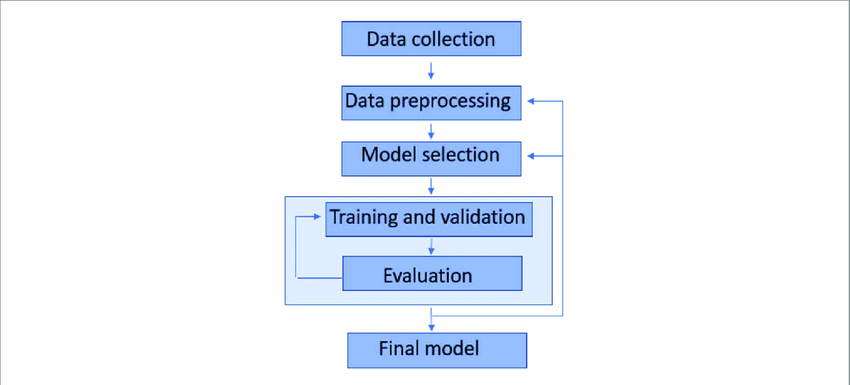

# **Data collection**

**Loading data using path**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install --upgrade PyDrive2

In [ ]:
#Google drive
#file_path = '/content/drive/My Drive/Crimes_-_2001_to_Present'
df = pd.read_csv('/content/drive/My Drive/Crimes_-_2001_to_Present.csv')

In [9]:
import warnings
warnings.filterwarnings("ignore", category=ImportWarning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47.0,5.0,05,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,6.0,44.0,08B,1183071.0,1847869.0,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)"


In [11]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(8077151, 22)

# **EDA** (Exploratory Data Analysis)

Null values, Outliers and Distributions

In [12]:
df.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     13087
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614846
Community Area          613470
FBI Code                     0
X Coordinate             88958
Y Coordinate             88958
Year                         0
Updated On                   0
Latitude                 88958
Longitude                88958
Location                 88958
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

## **Data observation**


Supervised [Regression / Classification [Balanced / Imbalanced] ] (or) Unsupervised [Clustering / Association]

Dependent column

Independent column

Continuous column

Category column

In [15]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [16]:
for column in df.columns:
  print(column,'---',len(df[column].unique()))

ID --- 7373082
Case Number --- 7372531
Date --- 3074782
Block --- 38456
IUCR --- 402
Primary Type --- 35
Description --- 548
Location Description --- 217
Arrest --- 2
Domestic --- 2
Beat --- 304
District --- 24
Ward --- 50
Community Area --- 78
FBI Code --- 27
X Coordinate --- 75662
Y Coordinate --- 125958
Year --- 24
Updated On --- 4993
Latitude --- 680707
Longitude --- 680319
Location --- 681421


The columns 'id' and 'case number' are unique identifiers for each row, so I dropped them to simplify the dataset and focus on the remaining features for analysis.

In [17]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [18]:
# Convert all column names to lowercase
df.columns = [col.lower() for col in df.columns]

In [19]:
df.drop(columns=['id', 'case number','date'], inplace=True)

In [20]:
category_col = ['primary type','arrest','domestic','district','community area','fbi code','year','ward']
continuous_col = ['block','iucr','description','location description','beat','x coordinate',
'y coordinate','updated on','latitude','longitude','location']
# Select only the numerical columns
string_columns = df.select_dtypes(exclude=['int64',"float64"]).columns
numeric_columns = df.select_dtypes(include=['int64',"float64"]).columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
numeric_columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['beat', 'district', 'ward', 'community area', 'x coordinate',
       'y coordinate', 'year', 'latitude', 'longitude'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7373082 entries, 1 to 8077150
Data columns (total 19 columns):
 #   Column                Dtype  
---  ------                -----  
 0   block                 object 
 1   iucr                  object 
 2   primary type          object 
 3   description           object 
 4   location description  object 
 5   arrest                bool   
 6   domestic              bool   
 7   beat                  int64  
 8   district              float64
 9   ward                  float64
 10  community area        float64
 11  fbi code              object 
 12  x coordinate          float64
 13  y coordinate          float64
 14  year                  int64  
 15  updated on            object 
 16  latitude              float64
 17  longitude             float64
 18  location              object 
dtypes: bool(2), float64(7), int64(2), object(8)
memory usage: 1.0+ GB


In [23]:
df.describe().T

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count,mean,std,min,25%,50%,75%,max
beat,7373082.0,1.181037e+03,702.773939,111.000000,6.210000e+02,1.034000e+03,1.724000e+03,2.535000e+03
district,7373082.0,1.128699e+01,6.954011,1.000000,6.000000e+00,1.000000e+01,1.700000e+01,3.100000e+01
ward,7373082.0,2.275423e+01,13.850022,1.000000,1.000000e+01,2.300000e+01,3.400000e+01,5.000000e+01
community area,7373082.0,3.744582e+01,21.534682,0.000000,2.300000e+01,3.200000e+01,5.700000e+01,7.700000e+01
x coordinate,7373082.0,1.164629e+06,16850.194010,0.000000,1.152976e+06,1.166166e+06,1.176399e+06,1.205119e+06
y coordinate,7373082.0,1.885737e+06,32288.696776,0.000000,1.858942e+06,1.890745e+06,1.909207e+06,1.951573e+06
year,7373082.0,2.011169e+03,6.321166,2001.000000,2.006000e+03,2.010000e+03,2.016000e+03,2.024000e+03
latitude,7373082.0,4.184206e+01,0.088832,36.619446,4.176835e+01,4.185596e+01,4.190663e+01,4.202271e+01
longitude,7373082.0,-8.767139e+01,0.061102,-91.686566,-8.771367e+01,-8.766571e+01,-8.762807e+01,-8.752453e+01


In [24]:
df[string_columns].describe().T

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count,unique,top,freq
block,7373082,38456,001XX N STATE ST,14966
iucr,7373082,402,0486,629202
primary type,7373082,35,THEFT,1563982
description,7373082,548,SIMPLE,818060
location description,7373082,217,STREET,1908322
arrest,7373082,2,False,5502714
domestic,7373082,2,False,6094081
fbi code,7373082,27,06,1563982
updated on,7373082,4993,02/10/2018 03:50:01 PM,2675880
location,7373082,681421,"(41.976290414, -87.905227221)",14009


In [25]:
df.duplicated().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


549002

In [26]:
df.drop_duplicates()

,block,iucr,primary type,description,location description,arrest,domestic,beat,district,ward,community area,fbi code,x coordinate,y coordinate,year,updated on,latitude,longitude,location
1,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,2515,25.0,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,1711,17.0,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,1922,19.0,47.0,5.0,05,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,632,6.0,6.0,44.0,08B,1183071.0,1847869.0,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)"
6,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,122,1.0,42.0,32.0,14,1174694.0,1901831.0,2023,11/04/2023 03:40:18 PM,41.886018,-87.633938,"(41.886018055, -87.633937881)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8077146,003XX N JEFFERSON ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,1214,12.0,42.0,28.0,11,1172269.0,1902384.0,2023,08/19/2023 03:40:26 PM,41.887589,-87.642827,"(41.887589411, -87.642826595)"
8077147,0000X W 95TH ST,031A,ROBBERY,ARMED - HANDGUN,SIDEWALK,False,False,634,6.0,9.0,49.0,03,1177527.0,1841973.0,2023,08/19/2023 03:40:26 PM,41.721698,-87.625345,"(41.72169837, -87.625345212)"
8077148,031XX S AVERS AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,1031,10.0,22.0,30.0,07,1151205.0,1883542.0,2023,08/19/2023 03:40:26 PM,41.836324,-87.720674,"(41.836323827, -87.720674149)"
8077149,078XX S SOUTH SHORE DR,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,421,4.0,7.0,46.0,14,1198338.0,1853426.0,2023,09/02/2023 03:41:45 PM,41.752631,-87.548737,"(41.752631346, -87.548737069)"


## **Correlation**

In [27]:
# Calculating correlation between column.
# Remove the column if it correlated from 0.7 to 1 because it highly correlated.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
# Select numerical columns (including both int and float types)
numerical_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix for numerical columns
numerical_df.corr()

,beat,district,ward,community area,x coordinate,y coordinate,year,latitude,longitude
beat,1.000000,0.953262,0.643211,-0.499842,-0.496809,0.620985,-0.036771,0.621387,-0.493415
district,0.953262,1.000000,0.684717,-0.494722,-0.539630,0.627772,-0.004180,0.628328,-0.536661
ward,0.643211,0.684717,1.000000,-0.530480,-0.448335,0.640790,0.020590,0.640939,-0.444054
community area,-0.499842,-0.494722,-0.530480,1.000000,0.250956,-0.756321,-0.015917,-0.755389,0.242633
x coordinate,-0.496809,-0.539630,-0.448335,0.250956,1.000000,-0.462292,0.011851,-0.464224,0.999831
y coordinate,0.620985,0.627772,0.640790,-0.756321,-0.462292,1.000000,0.009310,0.999994,-0.457203
year,-0.036771,-0.004180,0.020590,-0.015917,0.011851,0.009310,1.000000,0.009237,0.012130
latitude,0.621387,0.628328,0.640939,-0.755389,-0.464224,0.999994,0.009237,1.000000,-0.459188
longitude,-0.493415,-0.536661,-0.444054,0.242633,0.999831,-0.457203,0.012130,-0.459188,1.000000


In [29]:
correlation_matrix = numerical_df.corr()
fig = px.imshow(correlation_matrix, color_continuous_scale='Cividis',
                title="Correlation Matrix")
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Index(['block', 'iucr', 'primary type', 'description', 'location description',
       'arrest', 'domestic', 'beat', 'district', 'ward', 'community area',
       'fbi code', 'x coordinate', 'y coordinate', 'year', 'updated on',
       'latitude', 'longitude', 'location'],
      dtype='object')

## **Data visualization**

**Univariate analysis :**

1.   **Distribution of categorical data**: bar plot, pie chart
2.   **Distribution of continuous data**: Box plots, Histograms, kernel density plots


**Bivariate analysis :** correlation, multi correlation & influence


1.   **Continuous vs continuous**: Scatter plots also add a trend line to show any potential patterns or correlations.
2.   **Continuous vs categorical**: bar plot, Box plots or violin plots
3. **Categorical vs categorical**: contingency table or a stacked bar chart

In [31]:
import seaborn as sns
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,2,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7373082 entries, 1 to 8077150
Data columns (total 19 columns):
 #   Column                Dtype  
---  ------                -----  
 0   block                 object 
 1   iucr                  object 
 2   primary type          object 
 3   description           object 
 4   location description  object 
 5   arrest                bool   
 6   domestic              bool   
 7   beat                  int64  
 8   district              float64
 9   ward                  float64
 10  community area        float64
 11  fbi code              object 
 12  x coordinate          float64
 13  y coordinate          float64
 14  year                  int64  
 15  updated on            object 
 16  latitude              float64
 17  longitude             float64
 18  location              object 
dtypes: bool(2), float64(7), int64(2), object(8)
memory usage: 1.0+ GB


In [33]:
df.head(2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,block,iucr,primary type,description,location description,arrest,domestic,beat,district,ward,community area,fbi code,x coordinate,y coordinate,year,updated on,latitude,longitude,location
1,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,2515,25.0,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,1711,17.0,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"


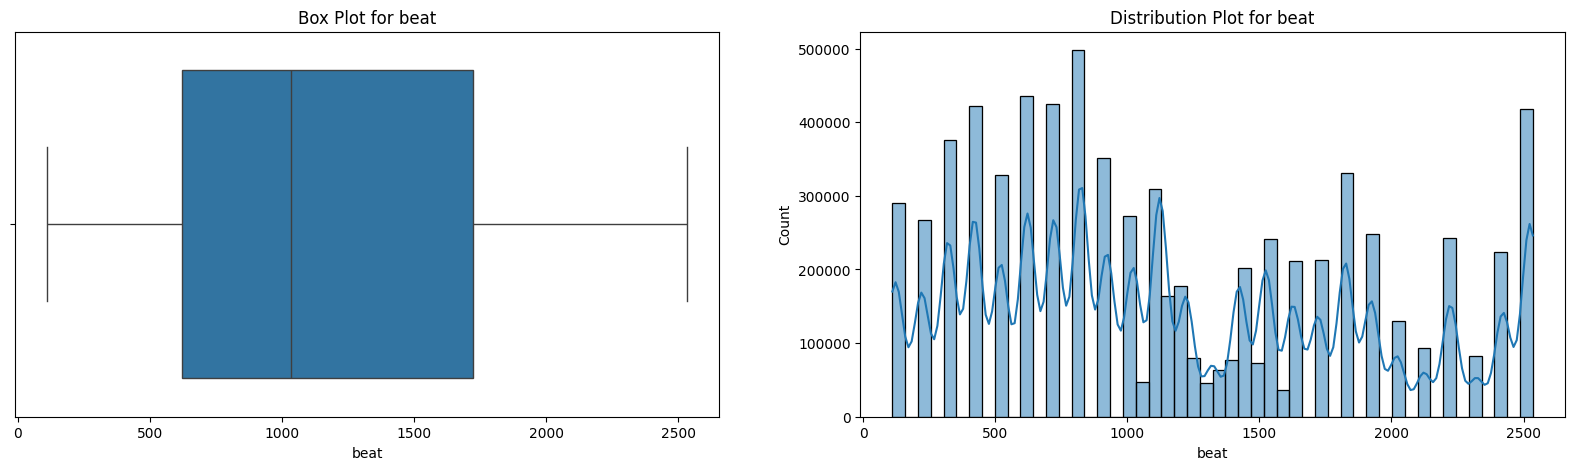

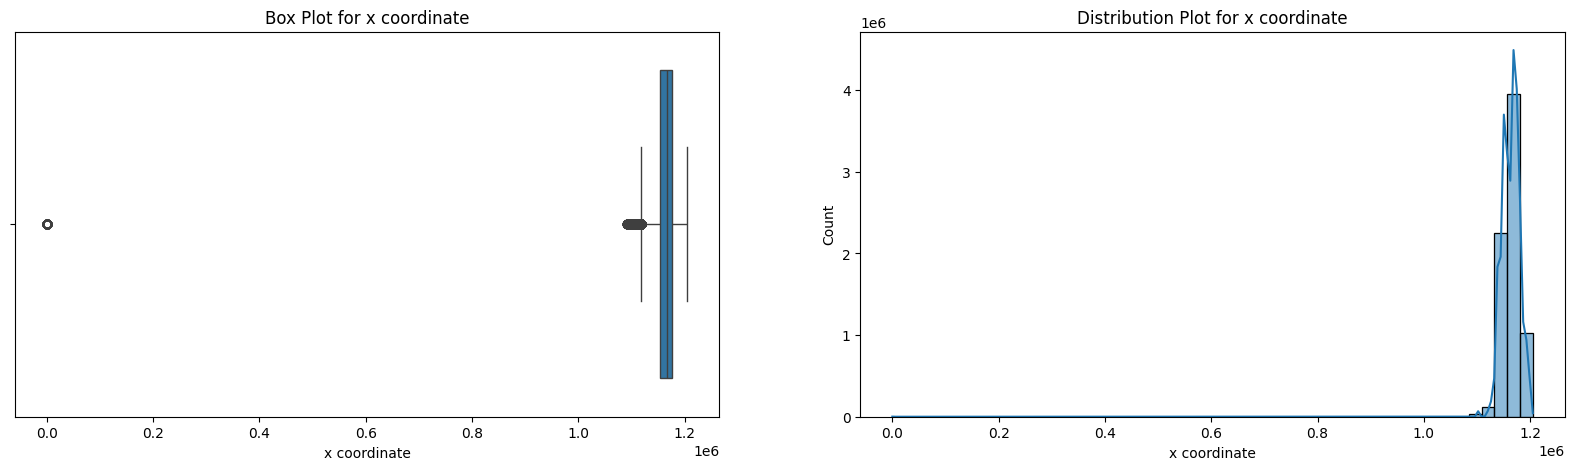

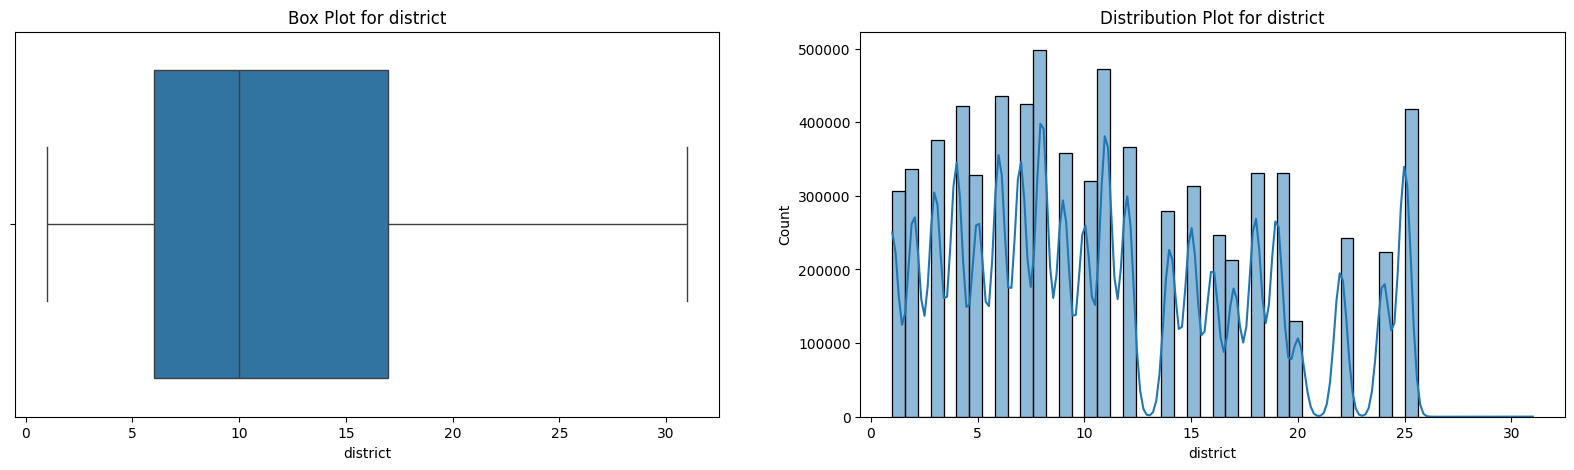

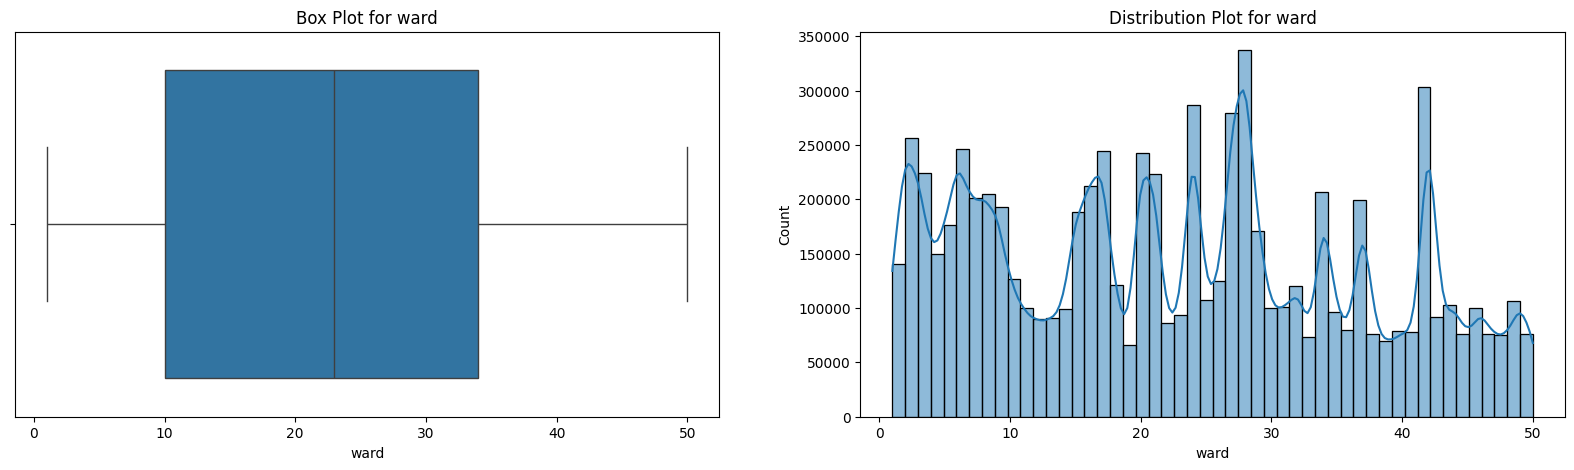

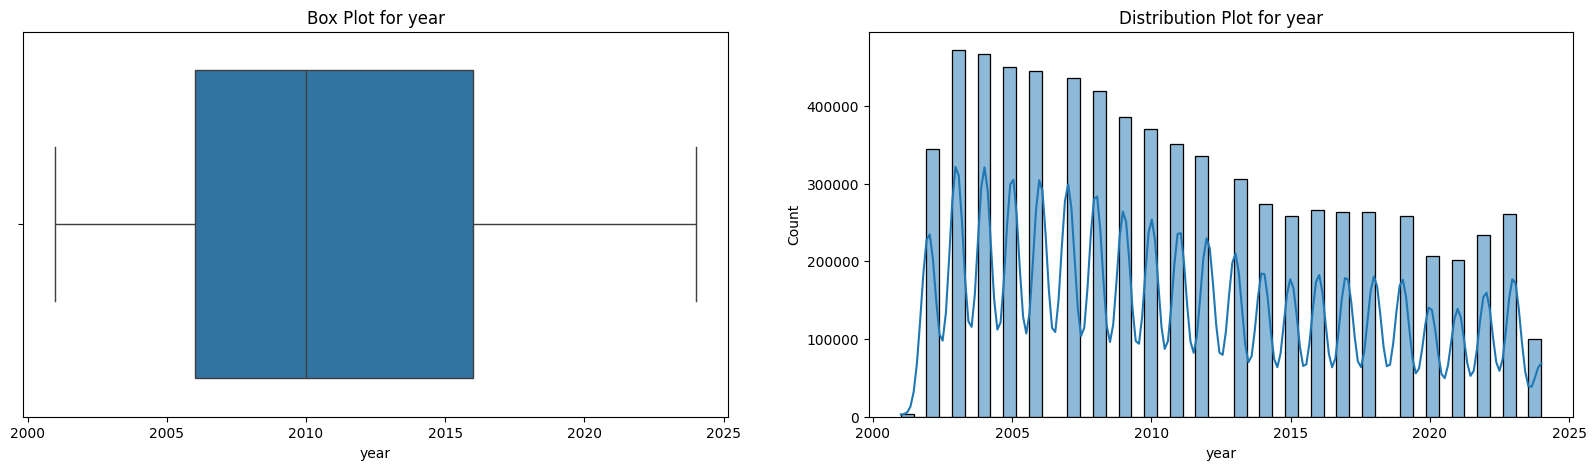

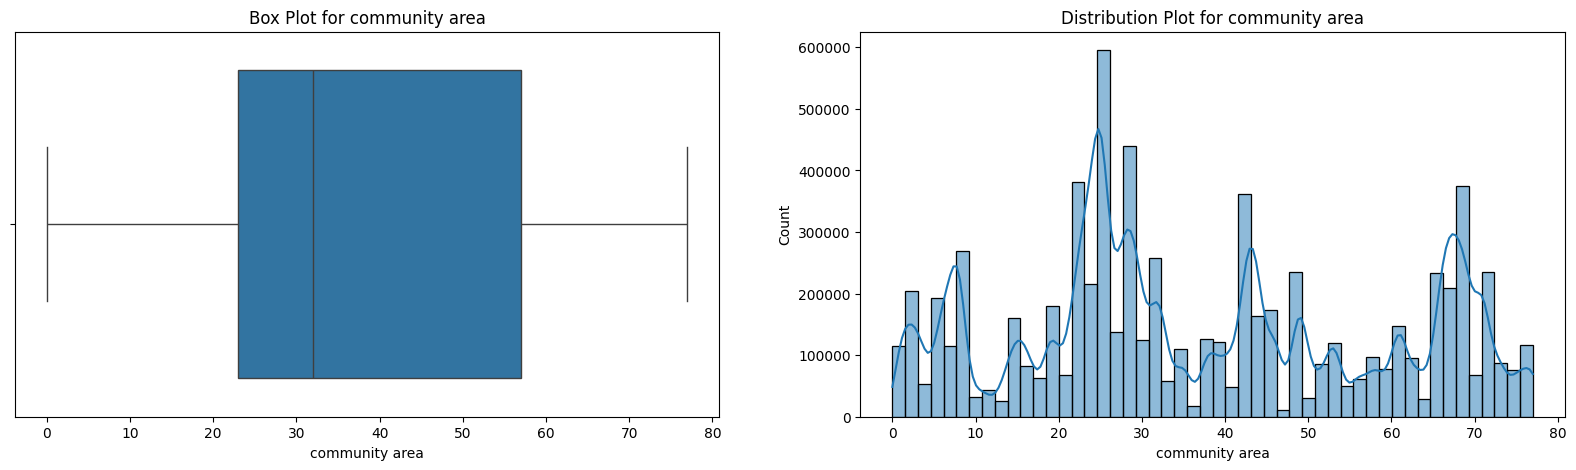

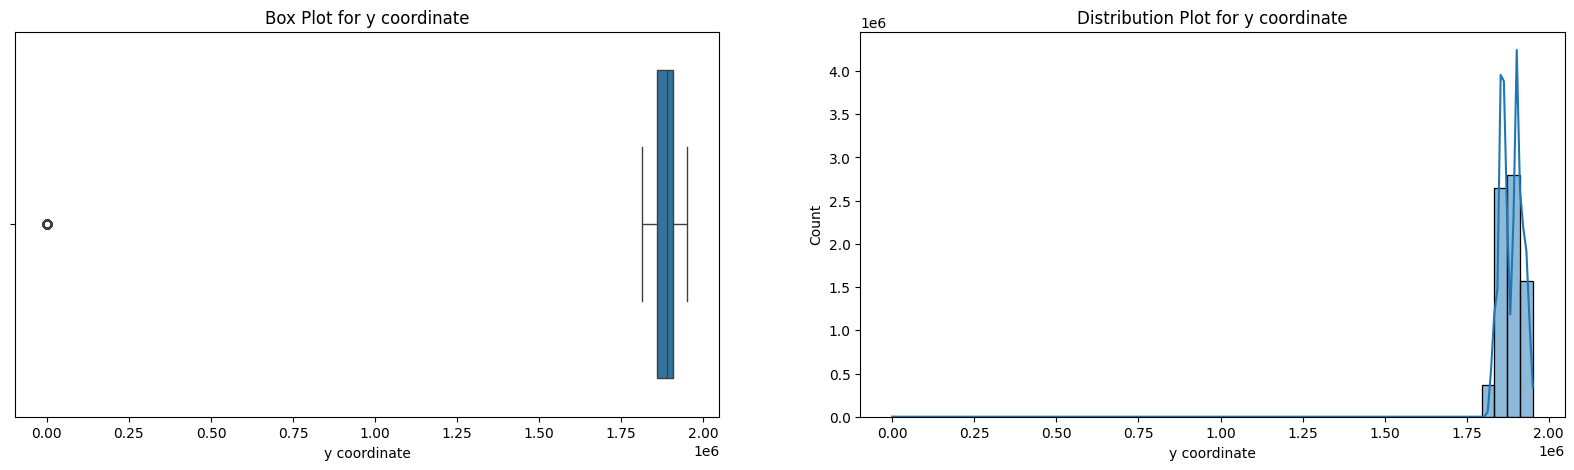

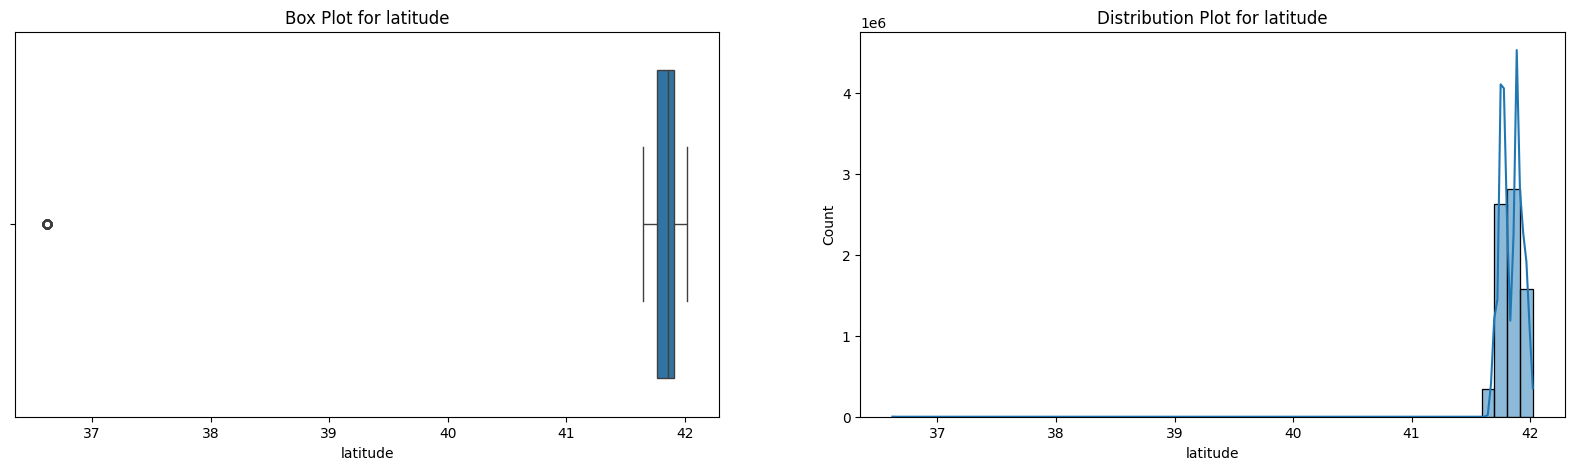

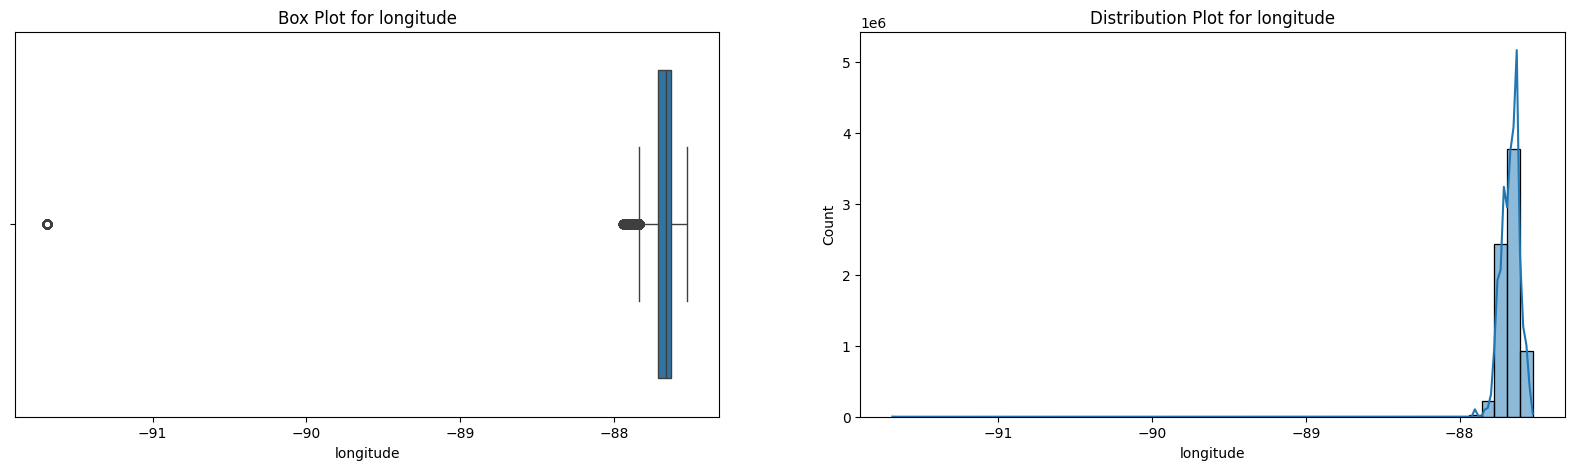

In [34]:
for i in ['beat','x coordinate','district','ward','year','community area',
          'y coordinate','latitude','longitude']:
    plot(df, i)

In [38]:
df['description'].dtype

dtype('O')

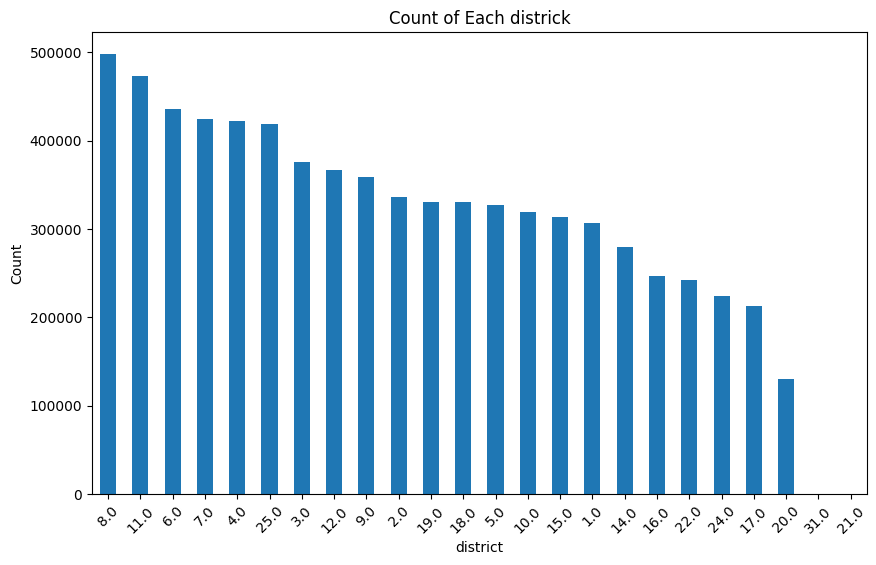

In [42]:
location_counts = df['district'].value_counts()
plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar')
plt.title('Count of Each districk')
plt.xlabel('district')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()